In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
iris.shape
type(iris)

pandas.core.frame.DataFrame

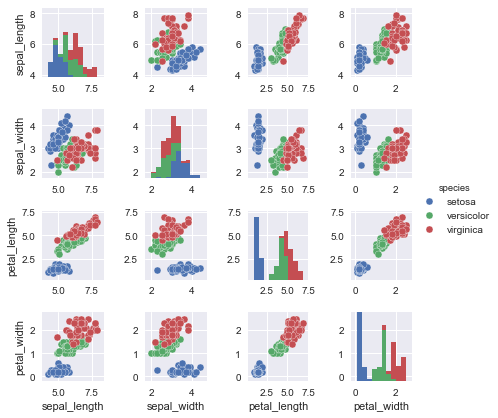

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [7]:
X_iris = iris.drop('species', axis=1)
X_iris.shape
y_iris = iris['species']
y_iris.shape

(150,)

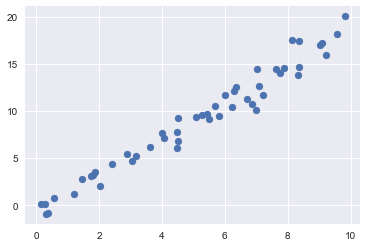

In [11]:
# Supervised Learning
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(40)
type(rng)
x = 10 * rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x,y);

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
x.shape
X = x[:, np.newaxis]
X.shape
y.shape

(50,)

In [19]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
type(model)

sklearn.linear_model.base.LinearRegression

In [21]:
model.coef_

array([ 1.93833995])

In [23]:
model.intercept_

-0.79127096699526511

In [30]:
xfit = np.linspace(-1, 11)
xfit.shape
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

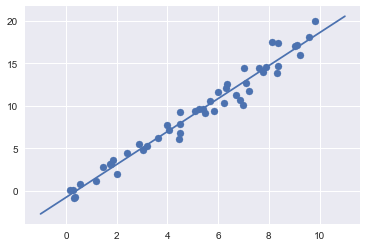

In [32]:
plt.scatter(x,y)
plt.plot(xfit, yfit);

In [36]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [38]:
Xtrain.shape
Xtest.shape

(38, 4)

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

In [44]:
# Unupervised Learning - Dimensonality Reduction
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)
X_2D.shape

(150, 2)

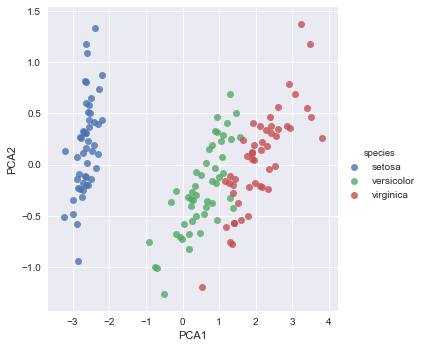

In [47]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [52]:
# Unsupervised Learning : Iris clustering
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

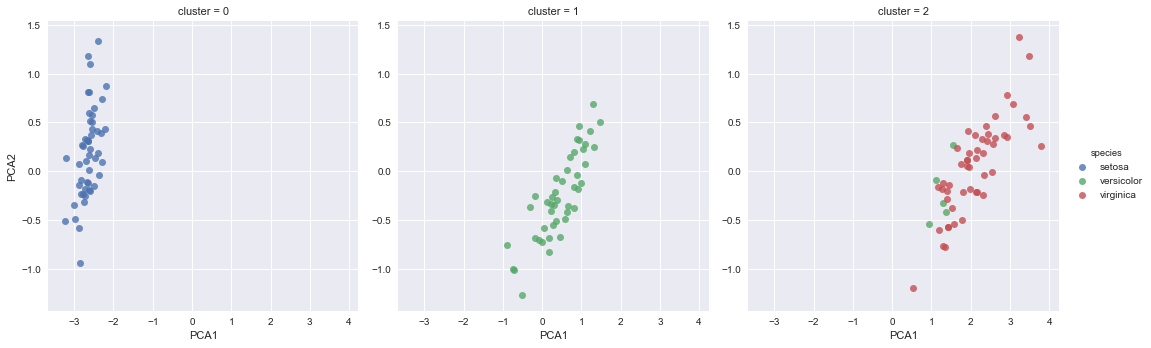

In [53]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [55]:
# Exploring Handwritten Digits
from sklearn.datasets import load_digits
digits = load_digits()
type(digits)
digits.images.shape

(1797, 8, 8)

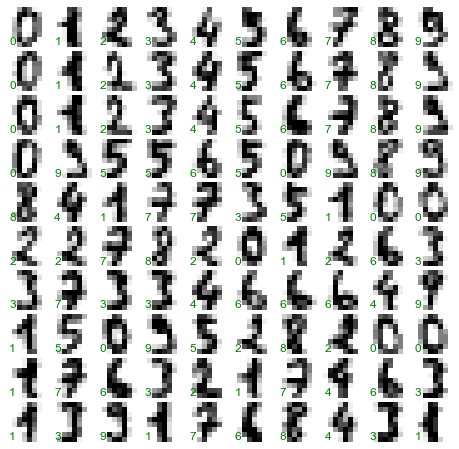

In [61]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8,8) ,subplot_kw={'xticks':[], 'yticks':[]}
                         , gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')


In [64]:
X = digits.data
X.shape
y = digits.target
y.shape

(1797,)

In [66]:
# Unsupervised Learning: Dimensionality Reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

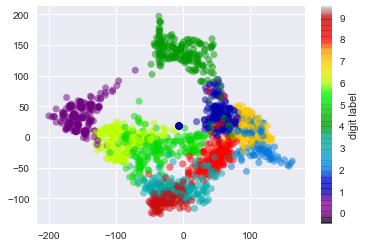

In [71]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5
           , cmap=plt.cm.nipy_spectral)
plt.colorbar(label='digit label', ticks= range(10))
plt.clim(-0.5, 9.5)

In [73]:
# Classification on Digits
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [74]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

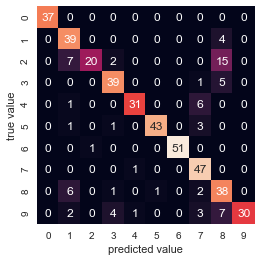

In [76]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

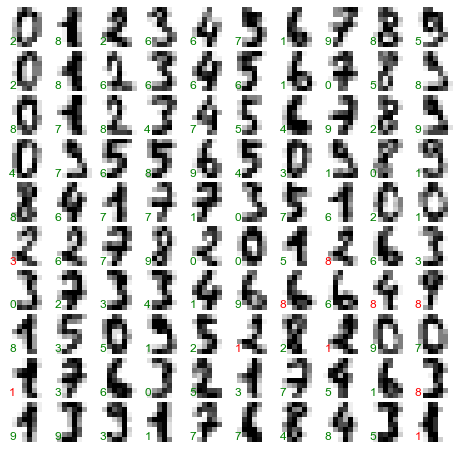

In [80]:
fix, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}
                         , gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes
           , color='green' if (ytest[i] == y_model[i]) else  'red')
    